# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import datetime, date
from numpy import sqrt, sin, cos, arcsin, arccos, radians, abs

# Import data

In [2]:
dirty_data = pd.read_csv('./dirty_data.csv')
warehouses_data = pd.read_csv('./warehouses.csv')

# Check for null data

In [3]:
dirty_data.isna().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

# Check for Order ID

In [4]:
print(f'Order id is unique: {dirty_data.order_id.is_unique}')

Order id is unique: True


# Check customer ID

In [5]:
print(f'Customer id is unique: {dirty_data.customer_id.is_unique}')

Customer id is unique: False


In [6]:
dirty_data['customer_id'].unique

<bound method Series.unique of 0      ID6197211592
1      ID0282825849
2      ID0579391891
3      ID4544561904
4      ID6231506320
           ...     
495    ID0247417082
496    ID0130015098
497    ID2707985442
498    ID0060088412
499    ID5257193650
Name: customer_id, Length: 500, dtype: object>

# Check for date

In [7]:
error_date_index = [i for i in range(len(dirty_data)) if not dirty_data.loc[i,'date'][2].isdecimal()]
print(error_date_index)

[43, 78, 114, 124, 136, 162, 168, 186, 242, 254, 275, 285, 326, 346, 354, 392, 438, 456, 476, 496]


In [8]:
for i in range(len(dirty_data)):
    test_date = dirty_data.loc[i, 'date']
    if not test_date[2].isdecimal():
        if int(test_date[0:2]) in {'Spring':[9, 10, 11], 'Summer':[12, 1, 2], 'Autumn':[3, 4, 5], 'Winter':[6, 7, 8]}.get(dirty_data.loc[i, 'season']):
            dirty_data.loc[i, 'date'] = datetime.strptime(test_date, f'%m{test_date[2]}%d{test_date[2]}%Y').date().__format__('%Y-%m-%d')
        else:
            dirty_data.loc[i, 'date'] = datetime.strptime(test_date, f'%d{test_date[2]}%m{test_date[2]}%Y').date().__format__('%Y-%m-%d')

In [9]:
error_date_index = [i for i in range(len(dirty_data)) if not dirty_data.loc[i,'date'][2].isdecimal()]
print(error_date_index)

[]


In [10]:
dirty_data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

In [11]:
dirty_data['date'] = pd.to_datetime(dirty_data['date'])

In [12]:
dirty_data.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object

# Check for season

In [13]:
dirty_data['season'].unique()

array(['Winter', 'Summer', 'Autumn', 'Spring', 'winter', 'spring',
       'autumn', 'summer'], dtype=object)

There are four uncapital season string in array.  
Therefore we need to capitalize all seasons that  
are not in capital format

In [14]:
# count number of season that in wrong format
dirty_data.groupby('season')['date'].count()

season
Autumn    124
Spring    133
Summer    121
Winter    110
autumn      3
spring      1
summer      3
winter      5
Name: date, dtype: int64

In [15]:
# wrong format season
error_season:list = [i for i in dirty_data['season'].unique() if i not in ['Spring', 'Summer', 'Autumn', 'Winter']]
print(error_season)

['winter', 'spring', 'autumn', 'summer']


In [16]:
# Capitalize all data in season column
for i in range(len(dirty_data)):
    if dirty_data.loc[i, 'season'] in error_season:
        dirty_data.loc[i, 'season']=dirty_data.loc[i, 'season'].title()

In [17]:
# Count again if there are any wrong format season
dirty_data.groupby('season')['date'].count()

season
Autumn    127
Spring    134
Summer    124
Winter    115
Name: date, dtype: int64

Text(0.5, 1.0, 'Winter')

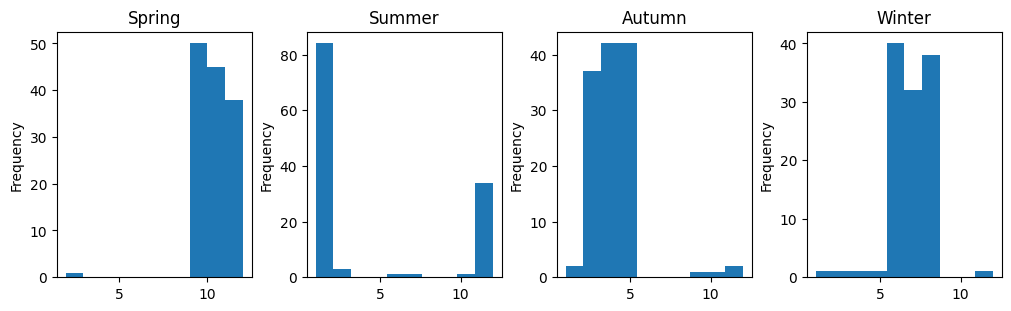

In [18]:
# Plot histogram of date group by seasons
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,4,1)
dirty_data[dirty_data['season'] == 'Spring']['date'].dt.month.plot.hist()
plt.title('Spring')
plt.subplot(1,4,2)
dirty_data[dirty_data['season'] == 'Summer']['date'].dt.month.plot.hist()
plt.title('Summer')
plt.subplot(1,4,3)
dirty_data[dirty_data['season'] == 'Autumn']['date'].dt.month.plot.hist()
plt.title('Autumn')
plt.subplot(1,4,4)
dirty_data[dirty_data['season'] == 'Winter']['date'].dt.month.plot.hist()
plt.title('Winter')

<Axes: title={'center': 'month'}, xlabel='[season]'>

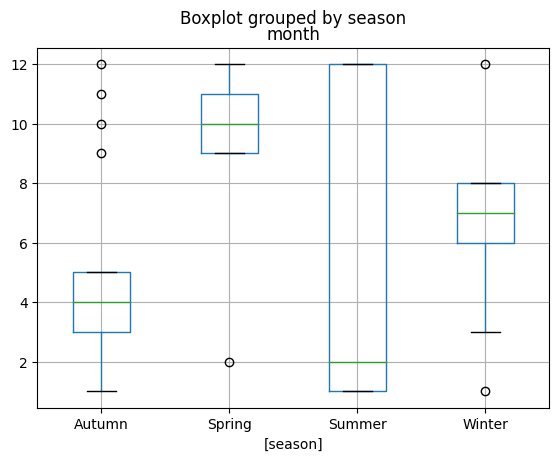

In [19]:
# Boxplot distribution of date group by seasons
month_season = pd.DataFrame(dirty_data['date'].dt.month.to_list(), columns=['month'])
month_season['season'] = dirty_data['season'].to_list()
month_season.boxplot(by='season')

From the above histogram plot and boxplot, we can easily aware that Autumn is last  
from March to May, Winter is from June to August and Spring is between September  
and November. As a result, Summer would be the periode from December to February.

In [20]:
# Define months of vary seasons as a dictionary
seasons:dict = {'Spring':[9, 10, 11], 'Summer':[12, 1, 2], 'Autumn':[3, 4, 5], 'Winter':[6, 7, 8]}

In [21]:
# Find the rows that have wrong season comparing with date
error_season = [i for i in range(len(dirty_data)) if dirty_data.loc[i,'date'].month not in seasons.get(dirty_data.loc[i, 'season'])]
print(error_season)

[9, 21, 34, 64, 82, 94, 102, 111, 135, 209, 215, 219, 236, 300, 350, 368, 381, 454, 467, 485]


In [22]:
# Replace wrong season in the error list
for i in error_season:
    month = dirty_data.loc[i, 'date'].month
    if month in [9, 10, 11] : season = 'Spring'
    elif month in [12, 1, 2] : season = 'Summer'
    elif month in [3, 4, 5] : season = 'Autumn'
    else : season = 'Winter'
    dirty_data.loc[i, 'season'] = season

In [23]:
# Check again
error_season = [i for i in range(len(dirty_data)) if dirty_data.loc[i,'date'].month not in seasons.get(dirty_data.loc[i, 'season'])]
print(error_season)

[]


# Check Customer latitude

In [24]:
dirty_data['customer_lat'].describe()

count    500.000000
mean     -35.835234
std       12.045393
min      -37.827123
25%      -37.818222
50%      -37.812165
75%      -37.805364
max       37.826339
Name: customer_lat, dtype: float64

<Axes: >

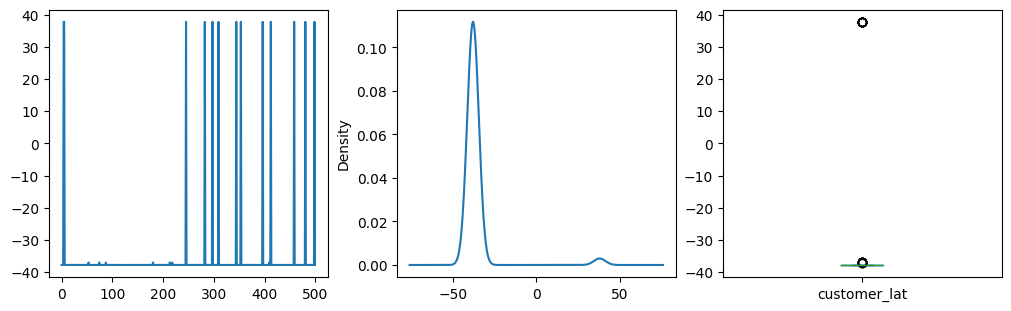

In [25]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['customer_lat'])
plt.subplot(1,3,2)
dirty_data['customer_lat'].plot.kde()
plt.subplot(1,3,3)
dirty_data['customer_lat'].plot.box()

In [26]:
IQR = dirty_data['customer_lat'].quantile(0.75) - dirty_data['customer_lat'].quantile(0.25)
lo_lim = dirty_data['customer_lat'].quantile(0.25) - 1.5*IQR
hi_lim = dirty_data['customer_lat'].quantile(0.75) + 1.5*IQR

In [27]:
outliers_lat = dirty_data['customer_lat'].loc[np.logical_or(dirty_data['customer_lat'] > hi_lim, dirty_data['customer_lat'] < lo_lim)].index.to_list()
print(outliers_lat)

[4, 5, 53, 74, 87, 180, 213, 218, 245, 282, 297, 309, 344, 353, 396, 409, 412, 458, 480, 498]


In [28]:
dirty_data = dirty_data.drop(outliers_lat)
dirty_data.reset_index(drop=True, inplace=True)

# Check for Customer longitude

In [29]:
dirty_data['customer_long'].describe()

count    480.000000
mean     144.969443
std        0.022705
min      144.924967
25%      144.953430
50%      144.965223
75%      144.983582
max      145.019837
Name: customer_long, dtype: float64

<Axes: >

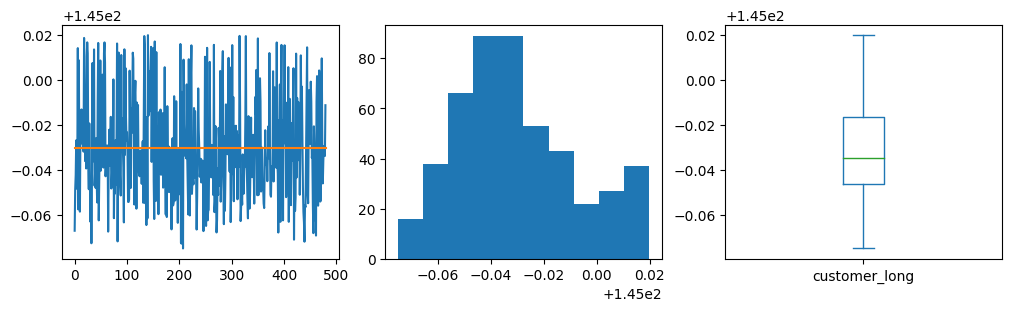

In [30]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['customer_long'])
plt.plot([0, len(dirty_data)], [dirty_data['customer_long'].mean(), dirty_data['customer_long'].mean()])
plt.subplot(1,3,2)
plt.hist(dirty_data['customer_long'])
plt.subplot(1,3,3)
dirty_data['customer_long'].plot.box()

# Check the nearest warehouse

In [31]:
print(f'Nearest warehouse is unique: {dirty_data.nearest_warehouse.is_unique}')

Nearest warehouse is unique: False


In [32]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

## Fix wrong warehouse's name

In [33]:
error_warehouses:list = [i for i in dirty_data['nearest_warehouse'].dropna().unique() if i not in list(warehouses_data['names'])]
print(error_warehouses)

['nickolson', 'thompson']


In [34]:
for i in range(len(dirty_data)):
    if dirty_data.loc[i, 'nearest_warehouse'] in error_warehouses:
        dirty_data.loc[i, 'nearest_warehouse']=dirty_data.loc[i, 'nearest_warehouse'].title()

In [35]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

## Check if Warehouse is the nearest one

In [36]:
warehouse_check: list = []
true_warehouse: list = []
for i in range(len(dirty_data)):
    [lat, lon] = dirty_data.loc[i, ['customer_lat', 'customer_long']]
    distance = [arccos(sin(radians(lat))*sin(radians(warehouses_data.iloc[t,1])) 
                + cos(radians(lat))*cos(radians(warehouses_data.iloc[t,1]))
                *cos(radians(warehouses_data.iloc[t,2] - lon)))*6371 
                for t in range(3)]
    warehouse = warehouses_data.iloc[distance.index(min(distance)), 0]
    true_warehouse.append(warehouse)
    warehouse_check.append(dirty_data.loc[i, 'nearest_warehouse'] == warehouse)

In [37]:
warehouse_error = [i for i in range(len(warehouse_check)) if not warehouse_check[i]]

In [38]:
#warehouse_error = [i for i in warehouse_error if i not in outliers_lat] # exclude data cause by the unusal value of customer latitude

In [39]:
for i in warehouse_error:
    dirty_data.loc[i, 'nearest_warehouse'] = true_warehouse[i]

In [40]:
dirty_data.groupby(by='nearest_warehouse')['order_id'].count()

nearest_warehouse
Bakers       132
Nickolson    165
Thompson     183
Name: order_id, dtype: int64

# Check for Distance to nearest warehouse

## Geographic distance between 2 location formula

$\begin{equation} \boxed{ d = \displaystyle 2r \cdot \arcsin{ \sqrt{ \sin{ \left( \frac{lat1 - lat2}{2} \right)}^2 + \cos{\left( lat1 \right)} \cdot \cos{\left(lat2\right)} \cdot \sin{\left( \frac{long1 - long2}{2} \right)}^2}} } \end{equation}$

or 

$\begin{equation} \boxed{d = \displaystyle \arccos{\Big[ \sin{(lat1)} \cdot \sin{(lat2)} + \cos{(lat1)} \cdot \cos{(lat2)} \cdot \cos{(long2 - long1)} \Big] \cdot r} } \end{equation}$

## Check if the distance is correct

In [41]:
dirty_data['distance_to_nearest_warehouse'].describe()

count    480.000000
mean       2.243676
std        8.991797
min        0.107800
25%        0.749950
50%        1.017600
75%        1.404625
max       94.973400
Name: distance_to_nearest_warehouse, dtype: float64

<Axes: >

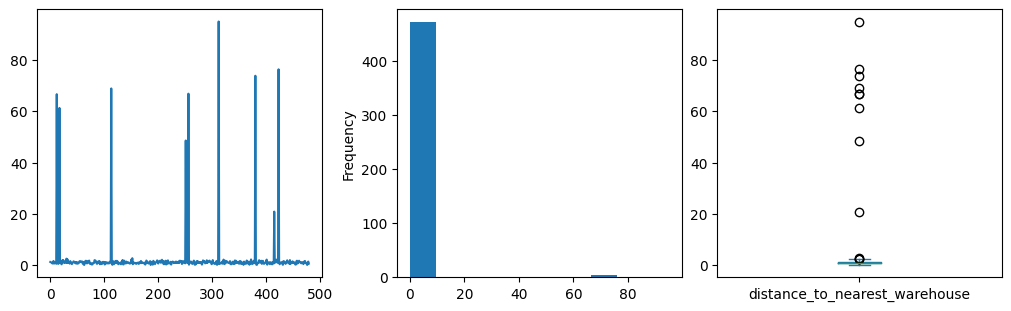

In [42]:
fig = plt.figure(figsize=(10,3),layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['distance_to_nearest_warehouse'])
plt.subplot(1,3,2)
dirty_data['distance_to_nearest_warehouse'].plot.hist()
plt.subplot(1,3,3)
dirty_data['distance_to_nearest_warehouse'].plot.box()

In [43]:
IQR = dirty_data['distance_to_nearest_warehouse'].quantile(0.75) - dirty_data['distance_to_nearest_warehouse'].quantile(0.25)
dis_lo_lim = dirty_data['distance_to_nearest_warehouse'].quantile(0.25) - 1.5*IQR
dis_hi_lim = dirty_data['distance_to_nearest_warehouse'].quantile(0.75) + 1.5*IQR

In [44]:
outliers_dis = dirty_data['distance_to_nearest_warehouse'].loc[
                    np.logical_or(dirty_data['distance_to_nearest_warehouse'] > dis_hi_lim, 
                                  dirty_data['distance_to_nearest_warehouse'] < dis_lo_lim)].index.to_list()
print(outliers_dis)

[12, 17, 30, 113, 152, 251, 253, 256, 312, 380, 415, 423]


In [45]:
dirty_data = dirty_data.drop(outliers_dis)
dirty_data.reset_index(drop=True, inplace=True)

In [46]:
distance_diff :list = []
warehouses_list = warehouses_data.loc[:, 'names'].to_list()
for i in range(len(dirty_data['distance_to_nearest_warehouse'])):
    [lat1, lon1] = dirty_data.loc[i, ['customer_lat', 'customer_long']]
    [lat2, lon2] = warehouses_data.loc[warehouses_list.index(dirty_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = round(2*6371*np.arcsin(sqrt(np.sin(np.radians((lat1 - lat2)/2))**2 
                     + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(np.radians((lon1-lon2)/2))**2)),4)
    distance_diff.append(abs(dirty_data.loc[i, 'distance_to_nearest_warehouse'] - distance))

In [47]:
distance_diff = pd.DataFrame(distance_diff, columns=['distance_diff'])

In [48]:
distance_diff.describe()

,distance_diff
count,468.000000
mean,0.048585
std,0.208083
min,0.000100
25%,0.000900
50%,0.001100
75%,0.001600
max,1.539100


<Axes: >

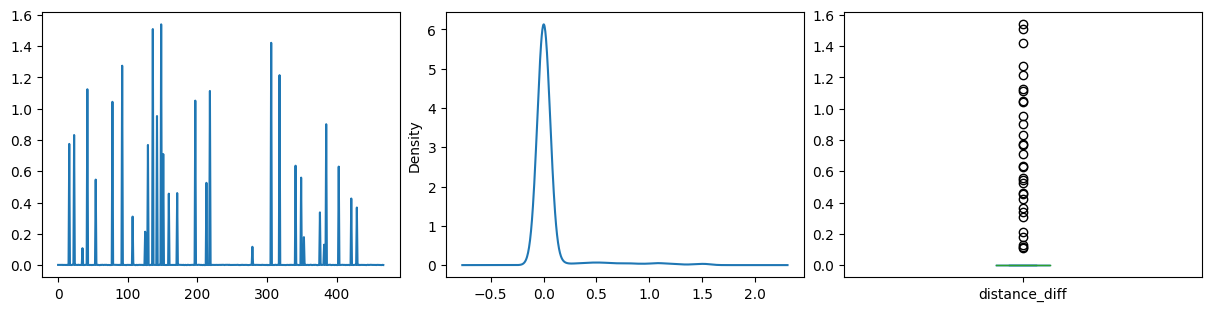

In [49]:
fig = plt.figure(figsize=(12,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(distance_diff)
plt.subplot(1,3,2)
distance_diff['distance_diff'].plot.kde()
plt.subplot(1,3,3)
distance_diff['distance_diff'].plot.box()

In [50]:
IQR = distance_diff['distance_diff'].quantile(0.75) - distance_diff['distance_diff'].quantile(0.25)
dis_diff_lo_lim = distance_diff['distance_diff'].quantile(0.25) - 1.5*IQR
dis_diff_hi_lim = distance_diff['distance_diff'].quantile(0.75) + 1.5*IQR

In [51]:
inapproriated_dis_diff = distance_diff['distance_diff'].loc[
                            np.logical_or(distance_diff['distance_diff'] > dis_diff_hi_lim, 
                                          distance_diff['distance_diff'] < dis_diff_lo_lim)].index.to_list()
print(inapproriated_dis_diff)

[16, 23, 35, 42, 54, 78, 92, 107, 125, 129, 136, 142, 148, 151, 159, 171, 197, 213, 218, 279, 306, 318, 341, 349, 353, 376, 382, 385, 403, 421, 429]


In [52]:
dirty_data = dirty_data.drop(outliers_dis)
dirty_data.reset_index(drop=True, inplace=True)

In [53]:
print(f"Number of null value: {distance_diff['distance_diff'].isnull().sum()}")

Number of null value: 0


# Check for Order price

In [54]:
dirty_data['order_price'].describe()

count       456.000000
mean      26755.258772
std       90287.368157
min         585.000000
25%        7080.000000
50%       13240.000000
75%       20547.500000
max      947691.000000
Name: order_price, dtype: float64

<Axes: >

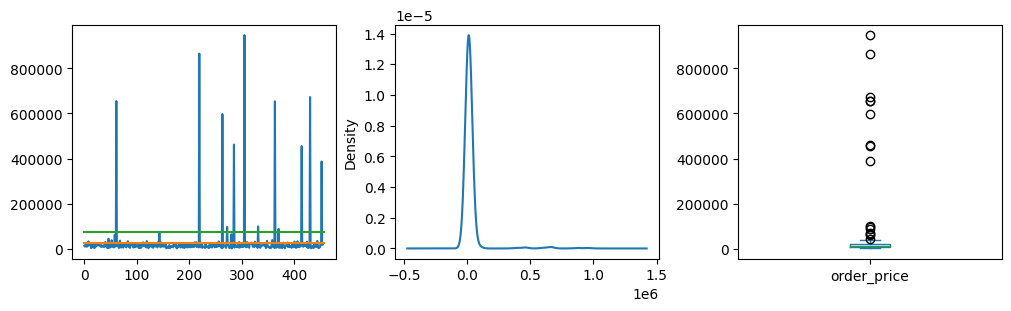

In [55]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['order_price'])
plt.plot([0,len(dirty_data)],[dirty_data['order_price'].mean(), dirty_data['order_price'].mean()])
plt.plot([0,len(dirty_data)], [dirty_data['order_price'].mean() + 0.5*dirty_data['order_price'].std(), dirty_data['order_price'].mean() + 0.5*dirty_data['order_price'].std()])
plt.subplot(1,3,2)
dirty_data['order_price'].plot.kde()
plt.subplot(1,3,3)
dirty_data['order_price'].plot.box()

In [56]:
IQR = dirty_data['order_price'].quantile(0.75) - dirty_data['order_price'].quantile(0.25)
order_lo_lim = dirty_data['order_price'].quantile(0.25) - 1.5*IQR
order_hi_lim = dirty_data['order_price'].quantile(0.75) + 1.5*IQR

In [57]:
outliers_order = dirty_data['order_price'].loc[
                            np.logical_or(dirty_data['order_price'] > order_hi_lim, 
                                          dirty_data['order_price'] < order_lo_lim)].index.to_list()
print(outliers_order)

[46, 58, 61, 143, 219, 263, 272, 280, 285, 305, 331, 363, 370, 414, 430, 452]


In [58]:
dirty_data = dirty_data.drop(outliers_order)
dirty_data.reset_index(drop=True, inplace=True)

# Check for Delivery charge

In [59]:
dirty_data['delivery_charges'].describe()

count    440.000000
mean      76.394386
std       14.467761
min       46.730000
25%       65.835000
50%       75.945000
75%       82.285000
max      114.040000
Name: delivery_charges, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2159fcc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff215a0e1f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7ff2159fc8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff215a0e730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff215a0e9d0>],
 'means': []}

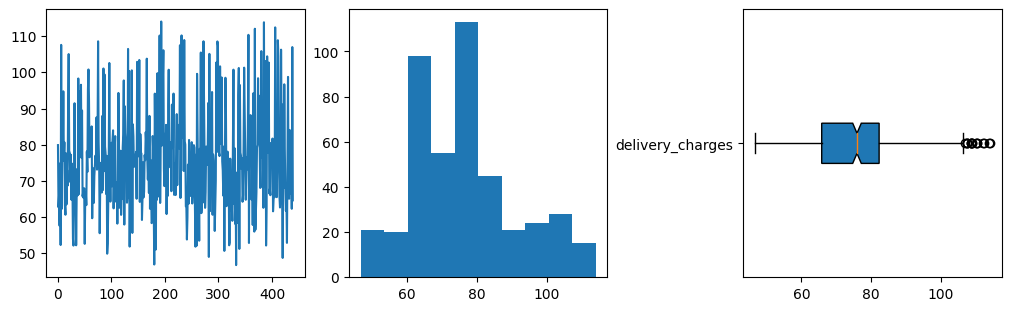

In [60]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['delivery_charges'])
plt.subplot(1,3,2)
plt.hist(dirty_data['delivery_charges'])
plt.subplot(1,3,3)
plt.boxplot(dirty_data['delivery_charges'], notch=True, vert=False, patch_artist=True, labels=['delivery_charges'])

In [61]:
IQR = dirty_data['delivery_charges'].quantile(0.75) - dirty_data['delivery_charges'].quantile(0.25)
deliverycharge_lo_lim = dirty_data['delivery_charges'].quantile(0.25) - 1.5*IQR
deliverycharge_hi_lim = dirty_data['delivery_charges'].quantile(0.75) + 1.5*IQR

In [62]:

outliers_deliverycharge = dirty_data['delivery_charges'].loc[
                                np.logical_or(dirty_data['delivery_charges'] > deliverycharge_hi_lim, 
                                              dirty_data['delivery_charges'] < deliverycharge_lo_lim)].index.to_list()
print(outliers_deliverycharge)


[6, 75, 190, 193, 228, 231, 236, 272, 298, 299, 356, 368, 385, 406, 411, 438]


In [63]:
dirty_data = dirty_data.drop(outliers_deliverycharge)
dirty_data.reset_index(drop=True, inplace=True)

# Check for Order total

In [64]:
dirty_data['order_total'].describe()

count    4.240000e+02
mean     4.251799e+04
std      2.960782e+05
min      6.392900e+02
25%      6.454735e+03
50%      1.129396e+04
75%      1.837895e+04
max      5.688270e+06
Name: order_total, dtype: float64

<Axes: >

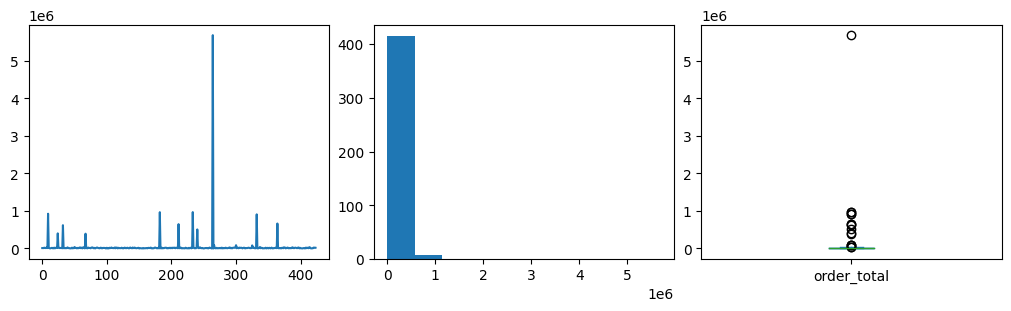

In [65]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['order_total'])
plt.subplot(1,3,2)
plt.hist(dirty_data['order_total'])
plt.subplot(1,3,3)
dirty_data['order_total'].plot.box()

In [66]:
IQR = dirty_data['order_total'].quantile(0.75) - dirty_data['order_total'].quantile(0.25)
ordertotal_lo_lim = dirty_data['order_total'].quantile(0.25) - 1.5*IQR
ordertotal_hi_lim = dirty_data['order_total'].quantile(0.75) + 1.5*IQR

In [67]:
outliers_ordertotal = dirty_data['order_total'].loc[
                            np.logical_or(dirty_data['order_total'] > ordertotal_hi_lim, 
                                          dirty_data['order_total'] < ordertotal_lo_lim)].index.to_list()
print(outliers_ordertotal)

[9, 24, 32, 50, 67, 182, 211, 233, 240, 264, 266, 300, 325, 332, 337, 364]


In [68]:
dirty_data = dirty_data.drop(outliers_ordertotal)
dirty_data.reset_index(drop=True, inplace=True)

# Data review pre and post processing

In [69]:
clean_data = dirty_data

In [70]:
dirty_data = pd.read_csv('./dirty_data.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff21551bdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff21552d2e0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7ff21551ba60>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff21552d820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff21552dac0>],
 'means': []}

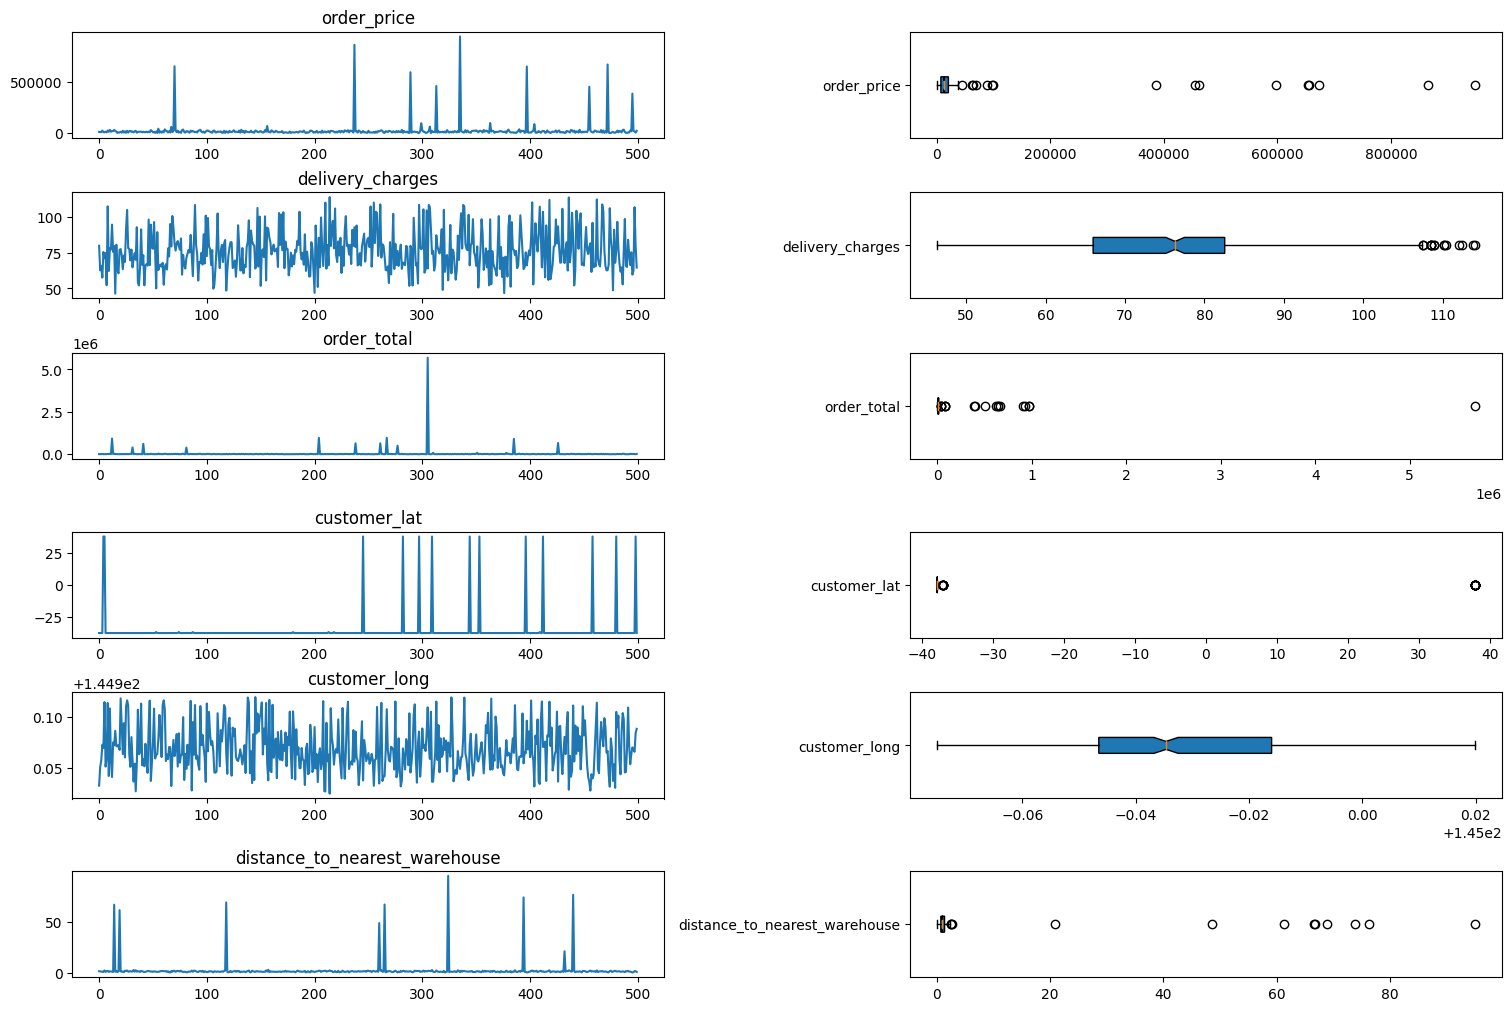

In [71]:
fig = plt.figure(figsize=(15,10), layout='constrained')
gs = GridSpec(nrows=6, ncols=2, figure=fig)
plt.subplot(gs[0,0])
plt.plot(dirty_data['order_price'])
plt.title('order_price')

plt.subplot(gs[0,1])
plt.boxplot(dirty_data['order_price'], notch=True, vert=False, patch_artist=True, labels=['order_price'])
#plt.title('order_price')

plt.subplot(gs[1,0])
plt.plot(dirty_data['delivery_charges'])
plt.title('delivery_charges')

plt.subplot(gs[1,1])
plt.boxplot(dirty_data['delivery_charges'], notch=True, vert=False, patch_artist=True, labels=['delivery_charges'])
#plt.title('delivery_charges')

plt.subplot(gs[2,0])
plt.plot(dirty_data['order_total'])
plt.title('order_total')

plt.subplot(gs[2,1])
plt.boxplot(dirty_data['order_total'], notch=True, vert=False, patch_artist=True, labels=['order_total'])
#plt.title('order_total')

plt.subplot(gs[3,0])
plt.plot(dirty_data['customer_lat'])
plt.title('customer_lat')

plt.subplot(gs[3,1])
plt.boxplot(dirty_data['customer_lat'], notch=True, vert=False, patch_artist=True, labels=['customer_lat'])
#plt.title('customer_lat')

plt.subplot(gs[4,0])
plt.plot(dirty_data['customer_long'])
plt.title('customer_long')

plt.subplot(gs[4,1])
plt.boxplot(dirty_data['customer_long'], notch=True, vert=False, patch_artist=True, labels=['customer_long'])
#plt.title('customer_long')

plt.subplot(gs[5,0])
plt.plot(dirty_data['distance_to_nearest_warehouse'])
plt.title('distance_to_nearest_warehouse')

plt.subplot(gs[5,1])
plt.boxplot(dirty_data['distance_to_nearest_warehouse'], notch=True, vert=False, patch_artist=True, labels=['distance_to_nearest_warehouse'])
#plt.title('distance_to_nearest_warehouse')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2151f88b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2151f8df0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7ff2151f8520>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff215189370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff215189610>],
 'means': []}

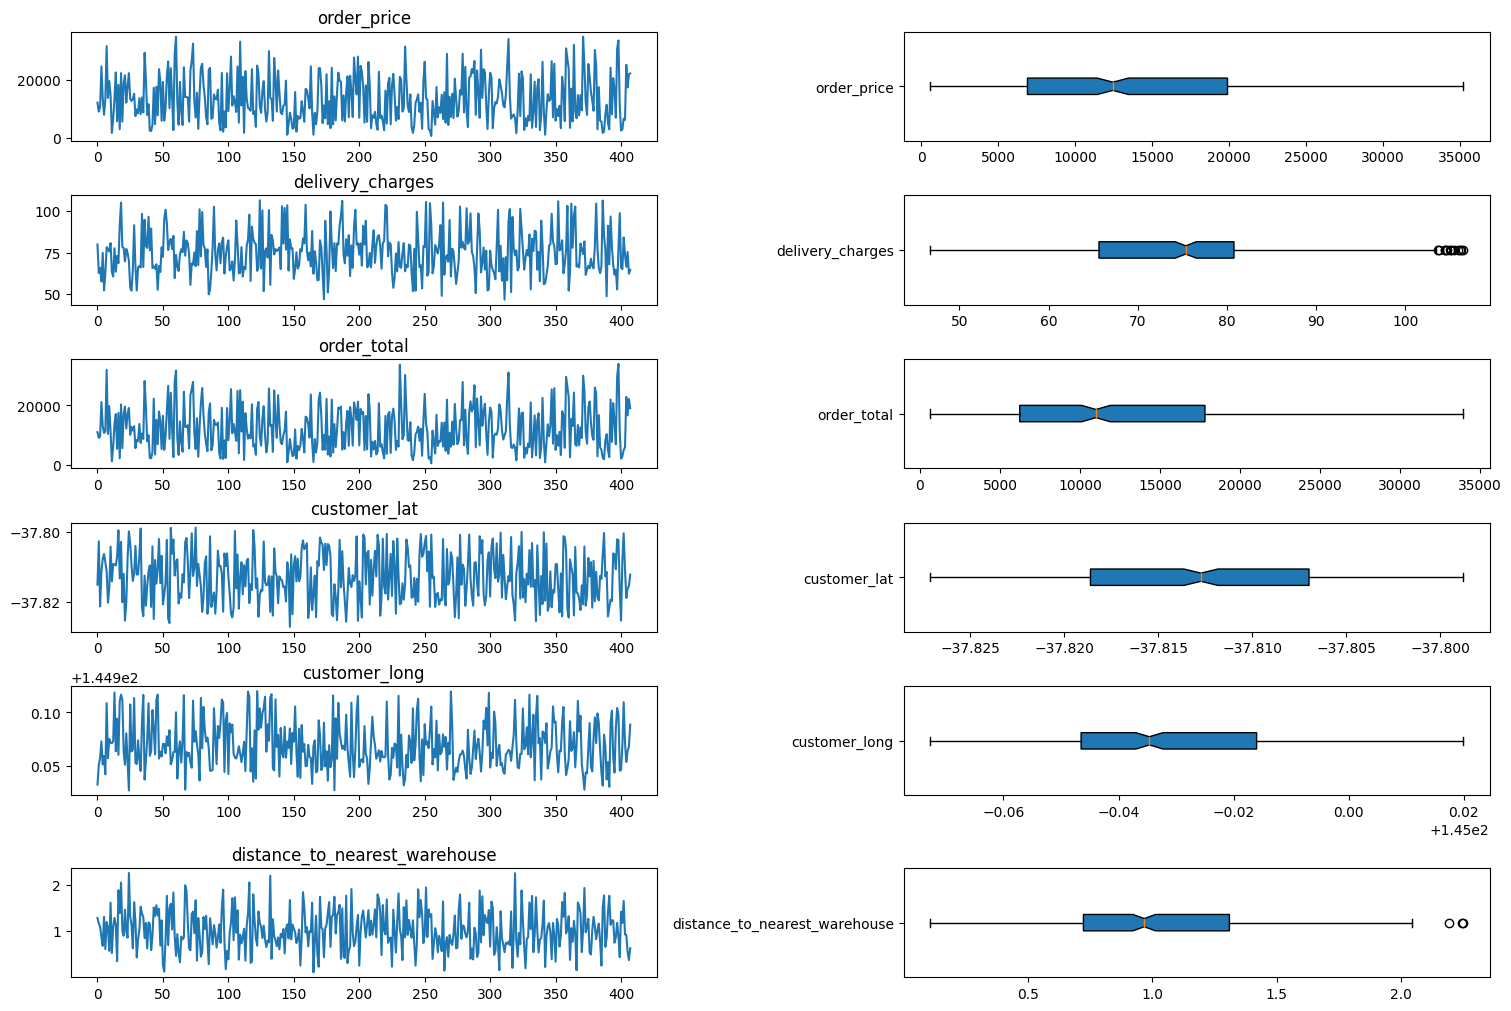

In [72]:
fig = plt.figure(figsize=(15,10), layout='constrained')
gs = GridSpec(nrows=6, ncols=2, figure=fig)
plt.subplot(gs[0,0])
plt.plot(clean_data['order_price'])
plt.title('order_price')

plt.subplot(gs[0,1])
plt.boxplot(clean_data['order_price'], notch=True, vert=False, patch_artist=True, labels=['order_price'])
#plt.title('order_price')

plt.subplot(gs[1,0])
plt.plot(clean_data['delivery_charges'])
plt.title('delivery_charges')

plt.subplot(gs[1,1])
plt.boxplot(clean_data['delivery_charges'], notch=True, vert=False, patch_artist=True, labels=['delivery_charges'])
#plt.title('delivery_charges')

plt.subplot(gs[2,0])
plt.plot(clean_data['order_total'])
plt.title('order_total')

plt.subplot(gs[2,1])
plt.boxplot(clean_data['order_total'], notch=True, vert=False, patch_artist=True, labels=['order_total'])
#plt.title('order_total')

plt.subplot(gs[3,0])
plt.plot(clean_data['customer_lat'])
plt.title('customer_lat')

plt.subplot(gs[3,1])
plt.boxplot(clean_data['customer_lat'], notch=True, vert=False, patch_artist=True, labels=['customer_lat'])
#plt.title('customer_lat')

plt.subplot(gs[4,0])
plt.plot(clean_data['customer_long'])
plt.title('customer_long')

plt.subplot(gs[4,1])
plt.boxplot(clean_data['customer_long'], notch=True, vert=False, patch_artist=True, labels=['customer_long'])
#plt.title('customer_long')

plt.subplot(gs[5,0])
plt.plot(clean_data['distance_to_nearest_warehouse'])
plt.title('distance_to_nearest_warehouse')

plt.subplot(gs[5,1])
plt.boxplot(clean_data['distance_to_nearest_warehouse'], notch=True, vert=False, patch_artist=True, labels=['distance_to_nearest_warehouse'])
#plt.title('distance_to_nearest_warehouse')

In [73]:
clean_data.to_csv('clean_data.csv', index=False, mode='w')

In [74]:
clean_data.describe()

,date,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,408,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,2019-06-27 16:56:28.235294208,13549.125000,75.103873,-37.812738,144.969727,10.784314,12247.270662,1.019085
min,2019-01-02 00:00:00,585.000000,46.730000,-37.827123,144.927270,0.000000,639.290000,0.107800
25%,2019-04-02 00:00:00,6905.000000,65.650000,-37.818602,144.953488,5.000000,6236.152500,0.723675
50%,2019-06-24 12:00:00,12455.000000,75.380000,-37.812727,144.965357,10.000000,11003.215000,0.968250
75%,2019-09-20 18:00:00,19905.000000,80.787500,-37.806979,144.983985,15.000000,17816.717500,1.310575
max,2019-12-31 00:00:00,35205.000000,106.460000,-37.798794,145.019837,25.000000,33947.060000,2.249300
std,NaN,8091.163056,13.294820,0.007128,0.022216,8.527887,7374.149433,0.438163


# Data Processing

Text(0.5, 1.0, 'Vanriance price by season')

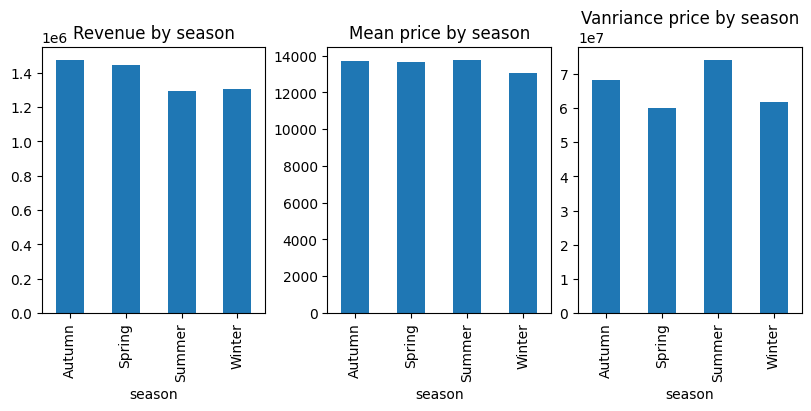

In [75]:
fig = plt.figure(figsize=(8,4),layout='constrained')
plt.subplot(1, 3, 1)
clean_data.groupby('season')['order_price'].sum().plot.bar(x='Season',y='Revenue')
plt.title('Revenue by season')
plt.subplot(1, 3, 2)
clean_data.groupby('season')['order_price'].mean().plot.bar(x='Season',y='Mean price')
plt.title('Mean price by season')
plt.subplot(1, 3, 3)
clean_data.groupby('season')['order_price'].var().plot.bar(x='Season',y='Variance price')
plt.title('Vanriance price by season')

<Axes: title={'center': 'order_price'}, xlabel='[season]'>

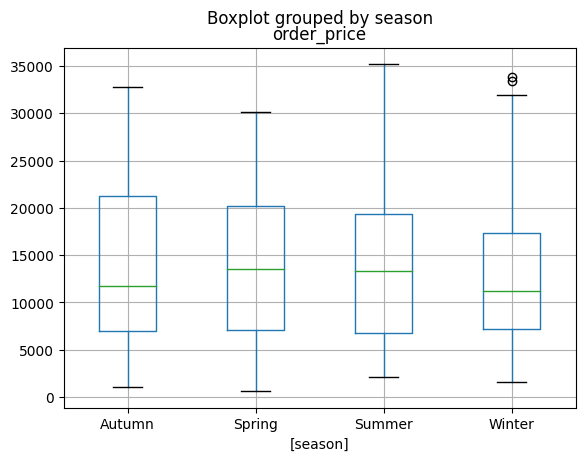

In [76]:
clean_data.loc[:,['order_price','season']].boxplot(by='season')

In [78]:
clean_data.groupby(by='season')['order_price'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Autumn,108.0,13685.694444,8257.172398,1010.0,6925.0,11782.5,21213.75,32745.0
Spring,106.0,13656.547170,7742.905811,585.0,7117.5,13480.0,20217.50,30140.0
Summer,94.0,13786.776596,8615.886809,2090.0,6742.5,13272.5,19312.50,35205.0
Winter,100.0,13064.370000,7861.745494,1525.0,7162.5,11225.0,17322.50,33870.0


In [79]:
clean_data['coupon_discount'].unique()

array([10,  0, 15,  5, 25])

In [80]:
clean_data.groupby('coupon_discount')['order_id'].count()

coupon_discount
0     86
5     79
10    80
15    87
25    76
Name: order_id, dtype: int64

In [81]:
clean_data.groupby('coupon_discount')['order_id'].count()/clean_data.groupby('coupon_discount')['order_id'].count().sum()*100

coupon_discount
0     21.078431
5     19.362745
10    19.607843
15    21.323529
25    18.627451
Name: order_id, dtype: float64

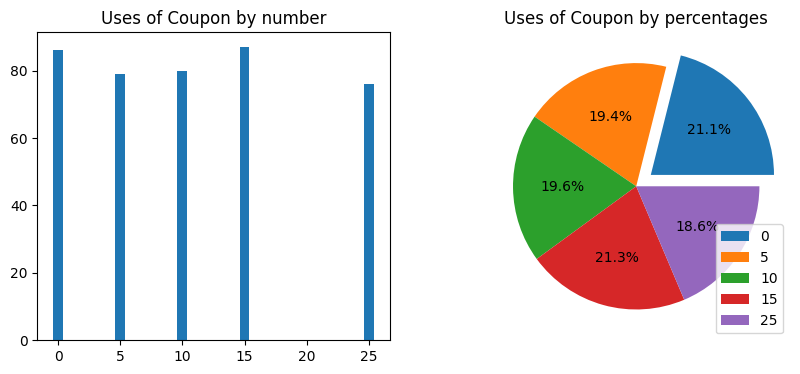

In [82]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))

labels=sorted(clean_data['coupon_discount'].unique())
counts=clean_data.groupby('coupon_discount')['order_id'].count().tolist()
sizes = (clean_data.groupby('coupon_discount')['order_id'].count()
        /clean_data.groupby('coupon_discount')['order_id'].count().sum()*100)
explode = (0.15, 0, 0, 0, 0)

ax0.bar(labels, counts)
ax0.set_title('Uses of Coupon by number')

ax1.pie(sizes, autopct='%1.1f%%', explode=explode)
ax1.set_title('Uses of Coupon by percentages')
ax1.legend(labels, loc='lower right')

In [83]:
clean_data['delivery_charges'].loc[clean_data['is_expedited_delivery']==True].describe()

count    195.000000
mean      83.531795
std       12.323609
min       57.930000
25%       76.855000
50%       80.560000
75%       94.120000
max      106.460000
Name: delivery_charges, dtype: float64

In [84]:
clean_data['delivery_charges'].loc[clean_data['is_expedited_delivery']==False].describe()

count    213.000000
mean      67.388169
std        8.672220
min       46.730000
25%       62.950000
50%       66.730000
75%       74.210000
max       85.480000
Name: delivery_charges, dtype: float64

<Axes: title={'center': 'delivery_charges'}, xlabel='[is_expedited_delivery]'>

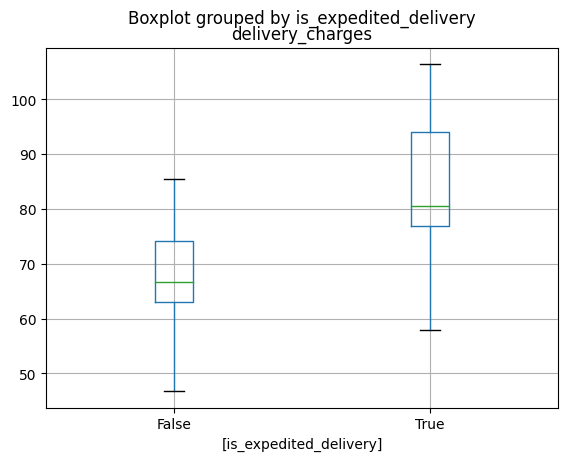

In [85]:
clean_data.loc[:, ['delivery_charges', 'is_expedited_delivery']].boxplot(by='is_expedited_delivery')